# Scipy Stats & Anova

This Jupyter Notebook is part of Brian Doheny's submission for the 2021/22 Machine Learning module at Galway-Mayo Insitute of Technology.

In this notebook you will find an introduction to the Scipy.Stats Python library, alongside explanations and examples of the ANOVA analysis technique.

## Put NBViewer here

## What is Scipy?

Scipy is an open source Python library that allows users to perform a multitude of science related programming (https://scipy.github.io/devdocs/tutorial/index.html#user-guide), and is one of the foundations of the Python Data Science toolkit for analysts, data scientists and more. As with many such libraries Scipy is built with Numpy in mind, and like Numpy, Scipy is built to be fast so that it can handle large amounts of data quickly and effectively (https://scipy.org/). 

While Scipy can be used for tasks such as optimization, integration and multidimensional image processing(, in this notebook I will be concentrating on the Stats subpackage. 

## Scipy.Stats

The Scipy.Stats sub-package provides functionality for statistical analyses, and is home to the Python implementations of many of the statistical tests that analysts and data scientists need in their day to day work. For example, the T-Test (https://scipy.github.io/devdocs/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp), Chi Square Test (https://scipy.github.io/devdocs/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare) and ANOVA (https://scipy.github.io/devdocs/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway) can all be found within Scipy.Stats alongside many more.

As well as these tests, Scipy also offers an extended range of summary and frequency statistics that are otherwise not available in Numpy. For example, one use Numpy to get the mean, median and such for their array, but will have to use Scipy.Stats if they wish to measure the kurtosis (https://scipy.github.io/devdocs/reference/generated/scipy.stats.kurtosis.html#scipy.stats.kurtosis) or skew (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) of that array.

Scipy also offers functionality for generating random data according to various probability distributions, offering a wider range than is otherwise available via Numpy.Random, such as mysterious sounding Crystalball Distribution (https://scipy.github.io/devdocs/reference/generated/scipy.stats.crystalball.html#scipy.stats.crystalball). Users can also transform their data so that it fits specific statistical tests via functions such as Box-Cox(https://scipy.github.io/devdocs/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox) or Yeo-Johnson (https://scipy.github.io/devdocs/reference/generated/scipy.stats.yeojohnson.html#scipy.stats.yeojohnson).

Throughout the remainder of this notebook, I will be focusing on Scipy.Stats ANOVA functionality. This includes the ANOVA (https://scipy.github.io/devdocs/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway) test itself, the tests to confirm that ANOVA is suitable for the given dataset, and some variations of ANOVA to be used when ANOVA conditions are not totally ideal.

# ANOVA (Analysis of Variance)

## What is ANOVA?

Analysis of Variance tests, more commonly referred to as ANOVA, is a statistical test that is used to check whether two or more groups from within a given populati, on have significant differences. It does this by comparing the variance of the observations within each group as well as taking the mean value of each group into account(https://www.qualtrics.com/uk/experience-management/research/anova/), and producing an F statistic which can be used to derive a P-Value. This P-Value tells us what probability there would be of getting such an extreme F statistic purely by chance (i.e. if there were no actual difference between the two groups) (https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/), and so it's common practice to accepted a P-Value less than 0.05 as being "statistically significant", as it represents a less than 5% probability that these results were due to chance. Some industries or use-cases may require somewhat different P-Value thresholds, depending on the risks of a Type 1 or Type 2 error.

## Hypothesis Testing

When running experiments or performing observational analysis on different groups, such as would be the case with ANOVA, we must start off with a hypothesis that we wish to test for. This hypothesis clearly details the difference we expect to see from the treatment, or across the various groups, and thus clarifies exactly which measure will be used in the statistical tests to be performed (i.e. ANOVA in this case). For example, in a randomized drug test the hypothesis may be that the drug lowers the blood pressure of the people taking the drug after a certain amount of time.

### Null and Alternate Hypothesis

With our initial hypothesis detailing what we expect to see, we can then create a null hypothesis and an alternate hypothesis. The alternate hypothesis is simply that change that you anticipate. So in my prior example, the alternate hypothesis would be "patients that take this drug have lower blood pressure by 5% after X amount of time".

Meanwhile the Null Hypothesis is opposite of the Alternate Hypothesis, and stats that there is no change or meaningful difference between groups. In the drug trial example, the null hypothesis would be "patients that take this drug see no change in their blood pressure after x amount of time".

As the analysis is performed, it is the null hypothesis that is assumed to be true until we find statistically significant evidence that it can be rejected and the alternate hypothesis accepted. It should be noted that the term "hypothesis" is used here for good reason, as rejecting the null hypothesis does not necessarily mean that the alternate hypothesis is the true cause of the change or difference, but that without other alternative hypotheses it can be accepted until such a time as it to is rejected.

This is where the P-Value kicks in. The P-Value tells us the probability of having encountered results as extreme as the results found in the given analysis if there were no notable difference. If the P-Value is high, then the probability of the results being down to chance is high, and therefore there isn't sufficient evidence to reject the null hypothesis. However, if the P-Value is low (usually below 0.05) then the null hypothesis can be confidently rejected, and the alternate hypothesis accepted. 

The null hypothesis and threshold for the P-Value is set before the experiment or analysis begins, so as to prevent "P-Hacking" whereby results can be massaged or thresholds changed in order to promote a seemingly stastically significant result, that otherwise wouldn't have rejected the null hypothesis (https://scienceinthenewsroom.org/resources/statistical-p-hacking-explained/). P-Hacking is not neccessarily a conscious decision, as our own biases can mean we accept results that otherwise wouldn't be significant, and so it's important that we set the thresholds before we begin the analysis so that these errors don't crop up.

(https://www.analyticsvidhya.com/blog/2021/01/an-introduction-to-hypothesis-testing/)


### Type I & Type II Errors

We use P-Values as a threshold for whether or not to reject a null hypothesis, as it limits the likelihood of an error being made. In hypothesis testing, errors fall into two main categories known as Type I Errors and Type II Errors.

Type I Errors are false positive results. In these situations the null hypothesis would be rejected when it's actually the more correct of the two hypotheses. By setting a P-Value threshold of 5% or lower,  we will only reject the null hypothesis if our results would only be this extreme 5% or less of the time. This means we can at least be confident that our results at least 95% likely to be significant, and so the risk of a Type I error having occured is 5% or less. However, if P-hacking has taken place, then the likelihood of a Type I error increases.

Type II Errors are false negatives. In these situations the null hypothesis was not rejected, when it actually should. This may be due to the distribution of the observed samples not fully representing the population, or that the measure used in the analysis was not the one that was actually impacted. The risk of type II errors can be reduced by increasing the statistiacl power of the analysis by increaseing the sample size, increasing the size of the effect we are measuring for (e.g. instead of looking for a 5% improvement, look for 10%), or by raising the P-Value threshold (with obvious knock on effects for more potential Type 1 errors). 

While analysts aim to avoid either error when designing their experiments, Type I errors are generally seen as the more critical of the two. This is because a Type I Error rejecting the null hypothesis, and thus accepting a new insight and possibly new actions as a result, whereas a Type II Error maintains the status quo. In most scenarios, taking action based on a Type I Error has the potential to cause more damage then carrying on with the status quo (as would be the case with a Type II error). This may not be true in all scenarios, as there may be situations where inaction is the larger risk.


https://www.scribbr.com/statistics/type-i-and-type-ii-errors/

### Notes - Things to be done!

* 6 assumptions of ANOVA
* Use toy (Diet) dataset to show a smooth example of ANOVA.
* Use students dataset to show a more realistic one, and other workarounds.
* Consider including ANCOVA is the students dataset is suitable.

Resources

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6532382/<br>
https://www.youtube.com/watch?v=0Vj2V2qRU10 <br>
https://www.qualtrics.com/uk/experience-management/research/anova/ <br>
https://online.stat.psu.edu/stat500/book/export/html/479<br>
https://www.scribbr.com/statistics/one-way-anova/<br>
https://learning.edanz.com/anova-explained/<br>
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/anova/<br>
https://towardsdatascience.com/analysis-of-variance-anova-8dc889d2fc3a<br>
https://towardsdatascience.com/what-is-anova-and-when-do-we-use-it-e0dcd8759c4e<br>
https://medium.com/@peterflom/anova-why-analyze-variances-to-compare-means-e3d4bbd3c05<br>
https://towardsdatascience.com/anovas-three-types-of-estimating-sums-of-squares-don-t-make-the-wrong-choice-91107c77a27a<br>
https://medium.com/omarelgabrys-blog/statistics-probability-t-distribution-anova-d1422928e3a<br>

## More Resources

Anova tutorial - https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php
* Mentions using a Tukey test post-hoc to see which groups had the difference<br>
6 assumptions: <br>
1) dependent variable is continuous, <br>
2) indepedent variables across 2 or 3 categories at least,<br> 
3) independence of observations (no observation can be in multiple categories), <br>
4) no significant outliers, <br>
5) dependent variable is normally distributed for each category, <br>
6) homogeneity of variances.<br>


Ancova tutorial - https://statistics.laerd.com/spss-tutorials/ancova-using-spss-statistics.php
* Similar to ANOVA but allows you to control for a 3rd measurement. e.g. if I'm looking at exercise and heartrate, but want to control for age.

Normality tests in python - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
* Dependent variable has to be normally distributed for each category.
* Can be done in scipy - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

Homogeneity of variances in Python - https://www.statology.org/levenes-test-python/
* https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/
* Also in Scipy - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

# Diet Dataset

Diet dataset - https://www.sheffield.ac.uk/mash/statistics/datasets
* Has 3 diet types
* Can look at differences in gender and age brackets



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels as sm
from statsmodels.stats import oneway, multicomp

In [2]:
diet_df = pd.read_csv('https://github.com/OtherBrian/machine-learning/blob/main/datasets/diet.csv')

# A few observations don't have a value for gender, and have no difference in pre/post weight. Removing these.
diet_df = diet_df[diet_df['gender'].isin(['0', '1'])]

# Going to measure the weight change from each diet 
diet_df['weightChange'] = diet_df['pre.weight'] - diet_df['weight6weeks']

diet_df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightChange
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
5,4,0,33,171,64,1,61.1,2.9
6,5,0,50,170,65,1,62.2,2.8


In [3]:
# Check how many I have in each group

diet_df['Diet'].value_counts()

3    27
2    25
1    24
Name: Diet, dtype: int64

In [4]:
# Splitting into DataFrames for each of the diets.

diet1 = diet_df[diet_df['Diet'] == 1]
diet2 = diet_df[diet_df['Diet'] == 2]
diet3 = diet_df[diet_df['Diet'] == 3]

# EDA

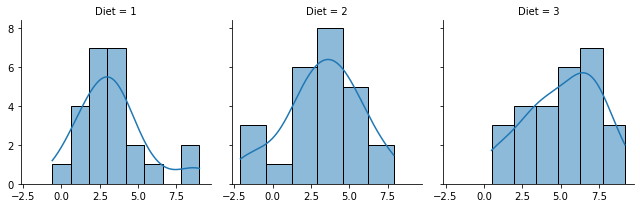

In [5]:
g = sns.FacetGrid(diet_df, col="Diet")
g.map_dataframe(sns.histplot, x="weightChange", kde=True);

# Checking normality

In [6]:
from scipy import stats
stats.shapiro(diet1['weightChange'])

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [7]:
stats.shapiro(diet2['weightChange'])

ShapiroResult(statistic=0.9793620705604553, pvalue=0.8721737861633301)

In [8]:
stats.shapiro(diet3['weightChange'])

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

## Result - All 3 are Normal!

# Checking Homogeneity of Variance

In [9]:
stats.levene(diet1['weightChange'], diet2['weightChange'], diet3['weightChange'])

LeveneResult(statistic=0.46290764582507116, pvalue=0.6312856401117967)

## Result - They're grand!

# One way Anova

In [10]:
stats.f_oneway(diet1['weightChange'], diet2['weightChange'], diet3['weightChange'])

F_onewayResult(statistic=5.383104474859926, pvalue=0.006595853108669741)

There's a significant difference here ( pvalue=0.006).

Can't see a way to do Tukey in scipy.stats, so will use statsmodels here...
https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html<br>
https://www.statology.org/tukey-test-python/

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=diet_df['weightChange'],
                          groups=diet_df['Diet'],
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.032    0.9 -1.6531 1.5891  False
     1      3   1.8481 0.0188  0.2567 3.4396   True
     2      3   1.8801 0.0152  0.3057 3.4546   True
---------------------------------------------------


## Result - Significant result between diets 1&3 and 2&3


# Students Dataset

The students dataset, made available via [FREIE UNIVERSITÄT BERLIN](https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/ANOVA/One-way-ANOVA-Hypothesis-Test/index.html) contains 8239 across various subject areas, and includes details such as test scores, height, weight, gender, salary, releigion and their salary.

For my one-way ANOVA analysis, I will use the Salary as my dependent variable, and the student's Major as my independent variable. A student cannot have two majors, and the future salary of a political science major should (hopefully) have no impact on the salary of an environmental sciences major.

## Importing Dataset & Exploratory Data Analysis

First, I'll import the data from a CSV file, and do some exploratory data analysis to get an idea of what I'm working with.

In [12]:
students_df = pd.read_csv('https://github.com/OtherBrian/machine-learning/blob/main/datasets/students.csv')

students_df.head()

,row,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
0,1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
1,2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
2,3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
3,4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
4,5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


Already I can see a few NaN values for salary, and so these will have to be removed from the dataset. ANOVA requires a continuous dependent variable, and so NaN's cannot be included.

In [13]:
students_df = students_df[students_df['salary'].notna()]
len(students_df)

1753

That has substantially reduced the size of the dataset, from the original 8239 students to just 1753. This is still more than enough for ANOVA analysis though. Before moving on I'll confirm that Salary is in fact a continuous variable.

In [14]:
students_df['salary'].describe()

count     1753.000000
mean     42522.112364
std      10333.139906
min      11444.141653
25%      35206.541598
50%      41672.009748
75%      49372.540906
max      75596.793441
Name: salary, dtype: float64

All of these values are floating point numbers, and so we can be sure it is a continuous variable. Also we can see that that median (50th percentile) and the mean are very close to each other (41672 and 42552 respectively), and so it's quite likely that these salaries are somewhat normally distributed. I will confirm this on a later step. We can also see that the minimum and maximum values are around 3 standard deviations from the mean, and so there's no major outliers.

This fulfills 2 of the 6 assumptions for running an ANOVA.
1) The dependent variable is continuous. <br>
2) There's no significant outliers.

Next I'll look how many possible values we have for "major" in order to determine our categorical independent variables.

In [15]:
students_df['major'].value_counts()

Environmental Sciences        345
Biology                       330
Economics and Finance         295
Political Science             289
Mathematics and Statistics    288
Social Sciences               206
Name: major, dtype: int64

We certainly have more than the 2 categorical groups required for ANOVA, and its not possible for a student to have more than 1 major. This means the dataset fulfils another two of the essential assumptions for ANOVA.<br>
3) Two or more independent categorical variables <br>
4) Independence of observations

## Checking for Normality

Next I'll take a look at the distribution of salaries for each of these groups, and determine if they are normally distributed. For this I can use Seaborn's facetgrid to plot multiple histograms. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

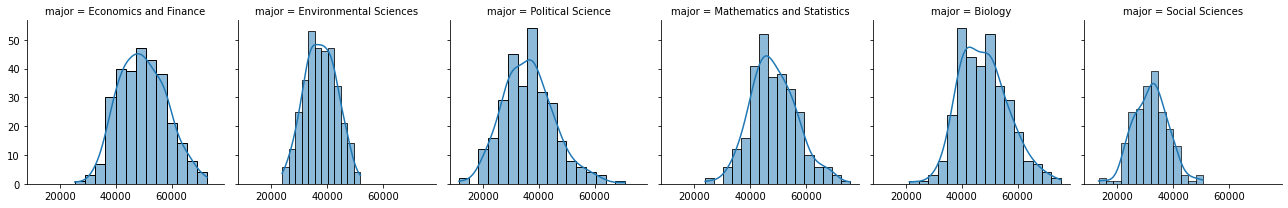

In [16]:
g = sns.FacetGrid(students_df, col="major")
g.map_dataframe(sns.histplot, x="salary", kde=True);

Each of these distributions look to be fairly normally distributed. However to confirm this, I will use the Shapiro-Wilk test(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). This tests a given array for normality, and among its two outputs is the P value. This P value tells us the probability that the given array came from a normal distribution, and so if the P value is greater than 0.05, we can be confident that it fulfills the normality assumption for ANOVA.

One thing to keep in mind is that Shaprio-Wilk test should not be used on arrays with more than 5000 observations, as the P-value can become inaccurate. I will go through an alternative test for normality in a later section.

In [17]:
# Slicing the dataset for each major

env_df = students_df[students_df['major'] == 'Environmental Sciences']
bio_df = students_df[students_df['major'] == 'Biology']
ecf_df = students_df[students_df['major'] == 'Economics and Finance']
pos_df = students_df[students_df['major'] == 'Political Science']
mas_df = students_df[students_df['major'] == 'Mathematics and Statistics']
sos_df = students_df[students_df['major'] == 'Social Sciences']

# Creating a dictionary for me to iterate through.
df_dict = {'Environmental Sciences': env_df, 
           'Biology': bio_df, 
           'Economics and Finance': ecf_df,
          'Political Science': pos_df,
          'Mathematics and Statistics': mas_df,
          'Social Sciences': sos_df}

# Creating a list to store the names of any majors that pass the Shapiro-Wilk test
normal_independent_variables = []

# Perform the Shapiro Wilk test on each dataframe. Print the result, and add to normal_majors if p_value is above 0.05
for major, data in df_dict.items():
    statistic, p_value = stats.shapiro(data['salary'])
    print(f'{major} P-Value: {str(p_value)}')
    if p_value >= 0.05:
        normal_independent_variables.append(major)
        
print('\nNormally distributed independent variables: ')
print(*normal_independent_variables, sep = ", ") 


Environmental Sciences P-Value: 0.22378472983837128
Biology P-Value: 0.0033741146326065063
Economics and Finance P-Value: 0.16668261587619781
Political Science P-Value: 0.010123440064489841
Mathematics and Statistics P-Value: 0.0942251980304718
Social Sciences P-Value: 0.603469967842102

Normally distributed independent variables: 
Environmental Sciences, Economics and Finance, Mathematics and Statistics, Social Sciences


Of the six majors, four are normally distributed. I will therefore continue with these four for now. I will return to the other majors later, as we can run the Kruskal-Wallis H Test instead of ANOVA in such situations. https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-3.php  <br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

## Checking for Homogeneity of Variance

I have one assumption left to check - the homogeneity of variance. For this I can use Levene's test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html). Like the Shapiro-Wilk test, the Levene's test will ouput a P-Value, and if its greater than 0.05 we can assume homogeneity of variance.

In [18]:
# Doing Levene's test against the four dataframes that passed the normality assumptuon.
statistic, p_value = stats.levene(env_df['salary'], 
                            ecf_df['salary'], 
                            mas_df['salary'], 
                            sos_df['salary'])

print(p_value)

1.0769895950989218e-12


When all four majors are included, the homogeneity of variance assumption is not met. It is still possible to analyse the variance between these majors, however I'll need to use another technique known as Welch's ANOVA. Welch's ANOVA is not currently featured in Scipy.Stats, so I can use Statsmodels (https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.anova_oneway.html) instead. I will revisit this later.

For now, I continue with two majors that do have homogeneity of variance - Economics & Finance, and Maths & Statistics.

In [19]:
statistic, p_value = stats.levene(ecf_df['salary'], 
                                 mas_df['salary'])

print(p_value)

0.44704786466598634


These two have a much higher P-Value, and so meet the last assumption for ANOVA. 

## ANOVA

Although it should be said that when we have just two independent variables, we can instead use the T-test (https://www.statology.org/what-is-the-difference-between-a-t-test-and-an-anova/). For the purposes of this demonstration I will continue with ANOVA for now (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

In [20]:
statistic, p_value = stats.f_oneway(ecf_df['salary'], mas_df['salary'])

print(p_value)

0.07324612866614046


This P-Value is above 0.05, and so we cannot say that there is sufficient evidence that the mean salaries of these two groups are statistically significant.

### T-Test

As mentioned above, with just two categorical variables, we could actually have done a T-Test here and got the same result. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [21]:
statistic, p_value = stats.ttest_ind(ecf_df['salary'], mas_df['salary'])

print(p_value)

0.07324612866615295


## Welch's ANOVA

We saw before that when we ran Levene's test on all four of our normally distributed independent variables, the test found that they did not have homogeneity of variances, and so were not suitable for ANOVA. In situations like this, we can instead use Welch's ANOVA. This is available via the Statsmodels library https://www.statisticshowto.com/welchs-anova/<br>
https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.anova_oneway.html



In [22]:
statistic, p_value = oneway.anova_oneway([env_df['salary'], 
                            ecf_df['salary'], 
                            mas_df['salary'], 
                            sos_df['salary']])

p_value

2.623052455425018e-131

Here we can see that the P-Value is far below 0.05 (the e-131 tells us that there's 130 0's after the decimal point), and so there's certainly a statistical significant difference between these groups. However, it doesn't tell us which groups are significantly different from each other. For this we will need to run a post-hoc test.

## Post-Hoc Analysis

### Why run Post-Hoc analysis? Why not do a bunch of T-Tests?

We generally assume significant if the p-value is less than 0.05. This means there's a 5% chance that we'll make a Type 1 error (https://www.scribbr.com/statistics/type-i-and-type-ii-errors/) and conclude that the results are statistically significant when they are in fact not. However, if we run multiple tests, each with a 5% chance of having a Type 1 error, then the likelihood of there being at least one Type 1 error increases as we do more tests(https://statisticsbyjim.com/anova/post-hoc-tests-anova/). You can find a humorous example of this via the popular webcomic XKCD (https://xkcd.com/882/). Post-Hoc analyses adjust the P-Value for each combination of tests, and thus reduce the risks of making Type 1 errors.

For situations where we've been able to use standard ANOVA due to homogeneity of variance, we would be able to use the Tukey's HSD test (https://sciencing.com/what-is-the-tukey-hsd-test-12751748.html). However, in this example I had to use Welch's ANOVA due to the differing variances. Fortunately, there is the Games-Howell Post-Hoc Multiple Comparisons Test which acts very similarly to Tukey's HSD test. At present, the only library I have found this available in is Pinguoin (https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html).

In [24]:
gameshowell_df = students_df[students_df['major'].isin(normal_independent_variables)]

In [25]:
import pingouin as pg

pg.pairwise_gameshowell(data=gameshowell_df, dv='salary',
                        between='major').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Economics and Finance,Environmental Sciences,49696.172,37652.678,12043.494,582.379,20.680,501.087,0.001,1.638
1,Economics and Finance,Mathematics and Statistics,49696.172,48443.507,1252.665,697.901,1.795,580.968,0.277,0.148
2,Economics and Finance,Social Sciences,49696.172,32044.006,17652.166,656.922,26.871,497.983,0.001,2.436
3,Environmental Sciences,Mathematics and Statistics,37652.678,48443.507,-10790.829,580.435,-18.591,492.009,0.001,-1.482
4,Environmental Sciences,Social Sciences,37652.678,32044.006,5608.672,530.457,10.573,403.291,0.001,0.930
5,Mathematics and Statistics,Social Sciences,48443.507,32044.006,16399.501,655.199,25.030,491.296,0.001,2.280


From this Games-Howell post-hoc multiple comparisons test we can see that most of the above combinations are statistically sigificantly different from each other. The only combination that is not statistically significant is the Economics & Finance and Mathematics & Statistics pairing, which we had already established via the ANOVA and T-Test above.

# Irish weather Dataset

Note - this dataset is not suitable, however it does show when the Shapiro test fails and another test is required.
I've also cut the filesize down massively be deleting all counties except Galway!
https://www.kaggle.com/conorrot/irish-weather-hourly-data

In [26]:
weather_df = pd.read_csv('https://github.com/OtherBrian/machine-learning/blob/main/datasets/irish_weather.csv', usecols=['county', 'station', 'temp'])

weather_df['temp'] = weather_df['temp'].str.extract(r'(\d+.\d+)').astype('float')
weather_df = weather_df[weather_df['temp'].notna()]

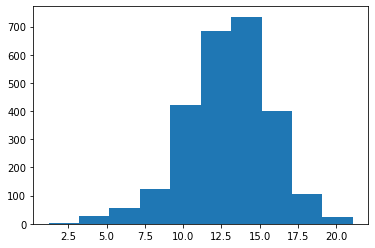

In [27]:
plt.hist(weather_df['temp']);

In [28]:
stats.shapiro(weather_df['temp'])

ShapiroResult(statistic=0.9876402020454407, pvalue=3.681475222870774e-14)

Dataset is too large to run Shapiro test, have to use Anderson test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

In [29]:
stats.anderson(weather_df['temp'], dist='norm')

AndersonResult(statistic=6.609765164403598, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Came out false anyway!